## 6.1 1次元入力2クラス分類

### 6.1.1 問題設定

In [68]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
# 重量x、性別tとして、重量から性別を予測するモデルを考える

# データ生成
np.random.seed(seed=0) # 乱数を固定
X_min = 0 
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n) # 説明変数30個。
T = np.zeros(X_n, dtype=np.uint8) # 目標データ30個。dtypeは符号なし8bit整数。
Dist_s = [0.4, 0.8] # 分布の開始地点
Dist_w = [0.8, 1.6] # 分布の幅
Pi = 0.5 # クラス0（メス）の確率

# XとTのデータを生成する
# 乱数wkが0.5未満はメス(0)、0.5以上はオス(1)
for n in range(X_n):
    wk = np.random.rand() # 0~1の乱数生成
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi) # wkが0.5未満はT[n]=0 / 0.5以上はT[n]=1
    # Distから質量をランダムに生成。
    # メスならば、T[n]=0だから「0~1の乱数*0.8+0.4」、オスならばT[n]=1だから「0~1の乱数*1.6+0.8」となる。
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]] 

print('X=' + str(np.round(X, 2)))
print('T=' + str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


In [70]:
# データ分布表示
def show_data1(x, t):
    K = np.max(t) + 1
    for k in range(K):
        # k番目のx,tを表示する
        plt.plot(x[t==k], t[t==k], X_col[k], alpha=0.5, linestyle='none', marker='o')
    plt.grid(True)
    plt.ylim(-.5,1.5)
    plt.xlim(X_min,X_max)
    plt.yticks([0,1])

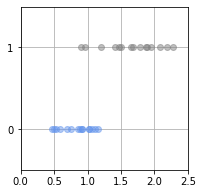

In [71]:
fig = plt.figure(figsize=(3,3))
show_data1(X, T)
plt.show()

### 6.1.2 確率で表すクラス分類

### 6.1.3 最尤推定

### 6.1.4 ロジスティック回帰モデル

データがガウス分布で近似できる　→　条件付き確率はロジスティック回帰モデルで表せる。  
ロジスティック回帰モデルはシグモイド関数の中に入れた形となる。

In [72]:
# ロジスティック回帰モデル
def logistic(x, w):
    y = 1 / (1 + np.exp(-(w[0] * x + w[1])))
    return y

In [73]:
# モデルの可視化
def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb, y, color='gray', linewidth=4)
    # 決定境界
    i = np.min(np.where(y>0.5)) # y>0.5を満たす要素で一番小さい値がiに入る。iはyが0.5を超えた直後の要素番号
    B = (xb[i-1] + xb[i]) / 2 # yを超えた直後のxb[i]とその直前のxb[i-1]の中点が決定境界の近似値としてBに格納
    plt.plot([B, B],[-.5, 1.5], color='k', linestyle='--')
    plt.grid(True)
    return B

1.25

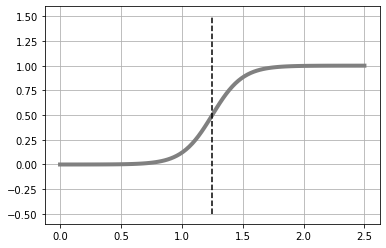

In [74]:
# test
W = [8, -10]
show_logistic(W)

### 6.1.5 交差エントロピー誤差

In [75]:
# 平均交差エントロピー誤差
def cee_logistic(w, x, t):
    y = logistic(x, w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1 - y[n]))
    cee = cee / X_n
    return cee

In [76]:
W = [1, 1]
cee_logistic(W, X, T)

1.0288191541851066

In [77]:
from mpl_toolkits.mplot3d import Axes3D

wn = 80
w_range = np.array([[0,15], [-15,0]])
w0 = np.linspace(w_range[0,0], w_range[0,1], wn)
w1 = np.linspace(w_range[1,0], w_range[1,1], wn)
ww0, ww1 = np.meshgrid(w0, w1)
C = np.zeros((len(w1), len(w0)))
w = np.zeros(2)

for i0 in range(wn):
    for i1 in range(wn):
        w[0] = w0[i0]
        w[1] = w1[i1]
        C[i1, i0] = cee_logistic(w, X, T)

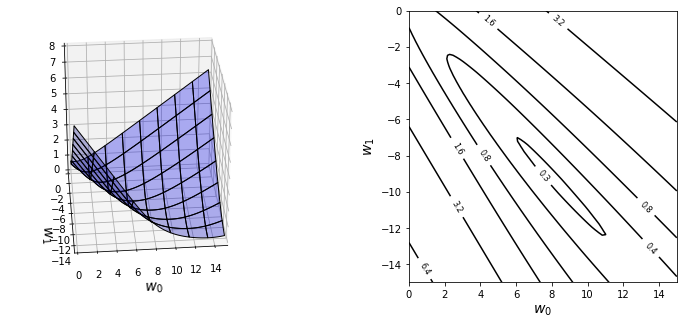

In [78]:
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(ww0, ww1, C, color='blue', edgecolor='black', rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0,15)
ax.set_ylim(-15,0)
ax.set_zlim(0,8)
ax.view_init(30,-95)

plt.subplot(1,2,2)
cont = plt.contour(ww0, ww1, C, 20, colors='black', levels=[0.26,0.4,0.8,1.6,3.2,6.4])
cont.clabel(fmt='%.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.show()

### 6.1.6 学習則の導出

In [79]:
# 平均交差エントロピー誤差の微分
def dcee_logistic(w, x, t):
    y = logistic(x, w)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    dcee = dcee / X_n
    return dcee

In [80]:
W = [1, 1]
dcee_logistic(W, X, T)

array([0.30857905, 0.39485474])

### 6.1.7 勾配法による解

In [81]:
from scipy.optimize import minimize

In [82]:
def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args=(x, t), jac=dcee_logistic, method='CG')
    return res1.x

w0=8.18, w1=-9.38
CEE = 0.25
Boundary = 1.15 g


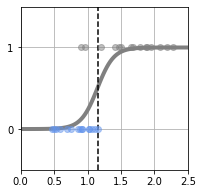

In [83]:
plt.figure(1, figsize=(3,3))
W_init = [1, -1]
W = fit_logistic(W_init, X, T)
print('w0={0:.2f}, w1={1:.2f}'.format(W[0], W[1]))
B = show_logistic(W)
show_data1(X, T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
print('CEE = {0:.2f}'.format(cee))
print('Boundary = {0:.2f} g'.format(B))
plt.show()

## 6.2 ２次元入力２クラス分類

### 6.2.1 問題設定

In [84]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [85]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
# データ生成
np.random.seed(seed=1) # 乱数を固定
N = 100 # データの数
K = 3 # 分布の数
T3 = np.zeros((N,3), dtype=np.uint8) #  ３クラス分類のデータ初期値（N行3列のゼロ行列）
T2 = np.zeros((N,2), dtype=np.uint8) #  ２クラス分類のデータ初期値（N行2列のゼロ行列）
X = np.zeros((N,2)) # N行2列の行列
X_range0 = [-3,3] # X0の表示用
X_range1 = [-3,3] # X1の表示用
Mu = np.array([[-.5,-.5],[.5,1.0],[1,-.5]]) # 分布の中心
Sig = np.array([[.7,.7],[.8,.3],[.3,.8]]) # 分布の分散
Pi = np.array([.4, 0.8, 1]) # 各分布への割合

In [87]:
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T3[n, k] = 1 # 生成した乱数がPiより小さい場合T3のn行k列に１を入れる
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k] + Mu[T3[n, :] == 1, k])

In [94]:
T2[:, 0] = T3[:,0]
T2[:, 1] = T3[:,1] | T3[:,2]

In [95]:
print(X[:5,:])

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


In [96]:
print(T2[:5,:])

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


In [97]:
print(T3[:5,:])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


In [98]:
def show_data2(x,t):
    wk, K = t.shape
    c = [[.5, .5, .5], [1, 1, 1], [0, 0, 0]]
    for k in range(K):
        plt.plot(x[t[:,k] == 1, 0], x[t[:, k] == 1, 1] , linestyle='none', markeredgecolor='black', marker='o', color=c[k], alpha=0.8)
    plt.grid(True)

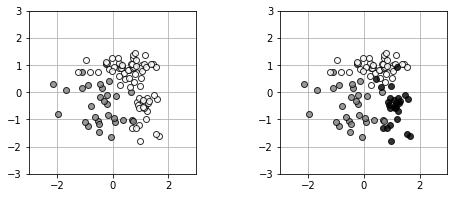

In [99]:
plt.figure(figsize=(7.5, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.subplot(1,2,2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

### 6.2.2 ロジスティック回帰モデル

In [100]:
# 　ロジスティック回帰モデル（入力データが二次元）
def logistic2(x0, x1, w):
    y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2])))
    return y

In [101]:
# モデル３D表示
from mpl_toolkits.mplot3d import axes3d

def show3d_logistic2(ax, w):
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    ax.plot_surface(xx0, xx1, y, color='blue', edgecolor='gray', rstride=5, cstride=5, alpha=0.3)
    
def show_data2_3d(ax, x, t):
    c = [[.5, .5, .5], [1, 1, 1]]
    for i in range(2):
        ax.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i, marker='o', color=c[i], markeredgecolor='black', linestyle='none', markersize=5, alpha=0.8)
    ax.view_init(elev=25, azim=-30)

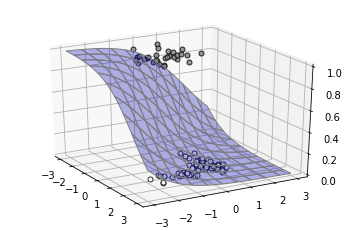

In [102]:
Ax = plt.subplot(1, 1, 1, projection='3d')
W = [-1, -1, -1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax, X, T2)
plt.show()

In [ ]:
# モデル等高線２D表示